# Documentation

__[wfdb](https://wfdb.readthedocs.io/en/latest/)__

---

__[scikit-FDA](https://fda.readthedocs.io/en/latest/)__

---

__[HeartPy](https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/index.html)__

---

__[ecg_plot](https://pypi.org/project/ecg-plot/)__ --not working

---

In [1]:
import pandas as pd
import numpy as np
import wfdb
from wfdb import processing
import ast
import ecg_plot
from scipy import stats
import skfda
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from fda import *

# 1. Loading annotation data

In [2]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [3]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [4]:
sampling_rate = 500

In [5]:
# Load and convert annotation data
Y = pd.read_csv(data_raw + 'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [6]:
# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(data_raw + 'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

In [7]:
# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

In [8]:
Y.describe()

,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,21837.000000,21748.000000,21837.000000,6983.000000,9429.000000,20328.000000,21819.000000,12426.000000,21837.000000
mean,11255.005953,59.836307,0.478912,166.708292,70.997561,2.292503,1.547229,0.747948,5.505335
std,6234.132489,16.953125,0.499567,10.864935,15.875146,3.254786,4.169753,1.183269,2.875306
min,302.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,5982.000000,50.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000
50%,11423.000000,62.000000,0.000000,166.000000,70.000000,1.000000,1.000000,1.000000,6.000000
75%,16614.000000,72.000000,1.000000,174.000000,80.000000,3.000000,2.000000,1.000000,8.000000
max,21797.000000,95.000000,1.000000,209.000000,250.000000,11.000000,50.000000,11.000000,10.000000


In [9]:
pd.set_option('display.max_columns', None)
Y.tail(20)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21818,19204.0,84.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-03-03 12:09:05,sinusrhythmus linkstyp mÄssige amplitudenkrite...,"{'NORM': 100.0, 'ABQRS': 0.0, 'VCLVH': 0.0, 'S...",LAD,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/21000/21818_lr,records500/21000/21818_hr,[NORM]
21819,9843.0,54.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-03-03 12:12:58,sinusrhythmus p-sinistrocardiale ueberdrehter ...,"{'IRBBB': 100.0, 'LAFB': 100.0, 'SR': 0.0}",ALAD,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/21000/21819_lr,records500/21000/21819_hr,[CD]
21820,18655.0,80.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-03-03 17:34:11,sinusrhythmus p-sinistrocardiale linkstyp unsp...,"{'IMI': 15.0, 'SR': 0.0}",LAD,unknown,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/21000/21820_lr,records500/21000/21820_hr,[MI]
21821,8382.0,53.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-03-05 12:31:07,sinusrhythmus linkstyp unvollstÄndiger rechtss...,"{'NORM': 80.0, 'IRBBB': 100.0, 'SR': 0.0}",LAD,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/21000/21821_lr,records500/21000/21821_hr,"[NORM, CD]"
21822,15134.0,55.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-03-06 12:06:03,sinusrhythmus lagetyp normal normales ekg 4.46...,"{'NORM': 100.0, 'SR': 0.0}",MID,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/21000/21822_lr,records500/21000/21822_hr,[NORM]
21823,18689.0,80.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-06 18:57:06,"sinusrhythmus linkstyp st & t abnorm, wahrsche...","{'NORM': 50.0, 'SR': 0.0}",LAD,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/21000/21823_lr,records500/21000/21823_hr,[NORM]
21824,19977.0,69.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-10 08:10:23,sinusrhythmus p-sinistrocardiale lagetyp norma...,"{'AMI': 15.0, 'ABQRS': 0.0, 'SR': 0.0}",MID,unknown,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,8,records100/21000/21824_lr,records500/21000/21824_hr,[MI]
21825,11197.0,59.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-12 11:07:26,sinusrhythmus lagetyp normal normales ekg 4.46...,"{'NORM': 100.0, 'SR': 0.0}",MID,NaN,NaN,1.0,False,True,True,NaN,", alles,",NaN,NaN,NaN,NaN,3,records100/21000/21825_lr,records500/21000/21825_hr,[NORM]
21826,9178.0,82.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-13 18:20:52,sinus arrhythmie ueberdrehter linkstyp linksan...,"{'IMI': 80.0, 'ABQRS': 0.0, 'SARRH': 0.0}",ALAD,unknown,NaN,1.0,False,True,True,NaN,", I-AVF,",NaN,NaN,NaN,NaN,10,records100/21000/21826_lr,records500/21000/21826_hr,[MI]


# 2. Data selection

In [10]:
# Select 'NORM' ECGs only
Y_norm = Y[Y.diagnostic_superclass.apply(lambda lst: any(d == 'NORM' for d in lst))]

In [11]:
Y_norm.describe()

,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,9528.000000,9522.000000,9528.000000,3257.000000,5267.000000,8968.000000,9518.000000,5427.000000,9528.000000
mean,11177.749685,52.159735,0.538623,167.077986,71.298652,2.412355,1.569237,0.729501,5.498111
std,6250.410289,17.305979,0.498532,10.742007,15.210457,3.295274,4.483843,1.190244,2.878418
min,306.000000,2.000000,0.000000,66.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,5754.750000,40.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000
50%,11220.500000,54.000000,1.000000,166.000000,70.000000,1.000000,1.000000,0.000000,5.000000
75%,16614.500000,65.000000,1.000000,175.000000,80.000000,4.000000,2.000000,1.000000,8.000000
max,21796.000000,94.000000,1.000000,209.000000,200.000000,11.000000,50.000000,10.000000,10.000000


In [12]:
# Drop all NaN values in column 'age' since from the count some values are missing
Y_age = Y_norm.dropna(subset=['age'])

In [13]:
# Select all healthy subjects between 30 and 45 years
Y_age = Y_age[(Y_age['age'] >= 30) & (Y_age['age'] <= 45)]

In [14]:
# Test what would be the datsete of intersection between known heights and weights
Y_bmi = Y_age.dropna(subset=['height', 'weight'])
print(Y_bmi.shape[0])

601


In [15]:
# select few records as example
df_Y = Y_age[:3]
df_Y.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
12,11031.0,43.0,1,NaN,44.0,2.0,0.0,CS-12 E,1984-12-21 08:02:26,sinusbradykardie sonst normales ekg,"{'NORM': 80.0, 'SBRAD': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,8,records100/00000/00012_lr,records500/00000/00012_hr,[NORM]
24,9012.0,41.0,0,NaN,69.0,2.0,0.0,CS-12 E,1985-01-26 10:15:03,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/00000/00024_lr,records500/00000/00024_hr,[NORM]


In [16]:
Y_bmi.describe()

,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,601.000000,601.000000,601.000000,601.000000,601.000000,533.000000,599.000000,591.000000,601.000000
mean,4532.638935,38.391015,0.520799,169.409318,74.056572,6.392120,3.213689,0.514382,5.620632
std,2781.609489,4.422501,0.499983,9.765868,17.371148,3.159021,7.623087,1.441296,2.845319
min,339.000000,30.000000,0.000000,135.000000,40.000000,0.000000,0.000000,0.000000,1.000000
25%,2464.000000,35.000000,0.000000,163.000000,62.000000,4.000000,1.000000,0.000000,3.000000
50%,4461.000000,39.000000,1.000000,170.000000,73.000000,7.000000,1.000000,0.000000,6.000000
75%,6298.000000,42.000000,1.000000,177.000000,83.000000,9.000000,1.000000,0.000000,8.000000
max,21796.000000,45.000000,1.000000,209.000000,179.000000,11.000000,50.000000,9.000000,10.000000


In [17]:
# BMI = weight / (height^2)
# we discard BMI < 16 or BMI > 30
bmi = Y_bmi.weight/(Y_bmi.height*Y_bmi.height/10000)
Y_bmi.insert(2, "bmi", bmi, True)

In [18]:
Y_bmi.describe()

,patient_id,age,bmi,sex,height,weight,nurse,site,validated_by,strat_fold
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,533.000000,599.000000,591.000000,601.000000
mean,4532.638935,38.391015,25.660112,0.520799,169.409318,74.056572,6.392120,3.213689,0.514382,5.620632
std,2781.609489,4.422501,4.905549,0.499983,9.765868,17.371148,3.159021,7.623087,1.441296,2.845319
min,339.000000,30.000000,14.172336,0.000000,135.000000,40.000000,0.000000,0.000000,0.000000,1.000000
25%,2464.000000,35.000000,22.321429,0.000000,163.000000,62.000000,4.000000,1.000000,0.000000,3.000000
50%,4461.000000,39.000000,25.059307,1.000000,170.000000,73.000000,7.000000,1.000000,0.000000,6.000000
75%,6298.000000,42.000000,28.344671,1.000000,177.000000,83.000000,9.000000,1.000000,0.000000,8.000000
max,21796.000000,45.000000,55.865922,1.000000,209.000000,179.000000,11.000000,50.000000,9.000000,10.000000


In [19]:
Y_bmi.head()

,patient_id,age,bmi,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
278,1202.0,35.0,34.049031,1,158.0,85.0,11.0,1.0,AT-6 C 5.8,1986-09-08 11:45:40,sinus rhythm. normal ecg.,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,0.0,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00278_lr,records500/00000/00278_hr,[NORM]
283,4715.0,45.0,18.144869,1,166.0,50.0,4.0,1.0,AT-6 C 5.5,1986-09-10 12:06:19,sinus arrhythmia. normal ecg.,"{'NORM': 100.0, 'SARRH': 0.0}",NaN,NaN,NaN,0.0,False,False,True,"v5-6,",NaN,NaN,NaN,NaN,NaN,2,records100/00000/00283_lr,records500/00000/00283_hr,[NORM]
302,2632.0,40.0,29.860551,0,183.0,100.0,11.0,1.0,AT-6 C 5.5,1986-09-13 06:31:07,sinus rhythm. normal ecg.,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,0.0,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00302_lr,records500/00000/00302_hr,[NORM]
303,3327.0,36.0,29.296875,1,160.0,75.0,8.0,1.0,AT-6 C 5.5,1986-09-13 08:30:50,sinus rhythm. normal ecg.,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,0.0,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00303_lr,records500/00000/00303_hr,[NORM]
335,3268.0,36.0,33.346481,0,167.0,93.0,7.0,1.0,AT-6 C 5.5,1986-09-17 12:52:38,sinus rhythm. normal ecg.,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,0.0,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/00000/00335_lr,records500/00000/00335_hr,[NORM]


In [20]:
Y_bmi = Y_bmi[(Y_bmi['bmi'] >= 16) & (Y_bmi['bmi'] <= 27.5)]

In [21]:
Y_bmi.describe()

,patient_id,age,bmi,sex,height,weight,nurse,site,validated_by,strat_fold
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,382.000000,429.000000,425.000000,430.000000
mean,4529.504651,38.200000,23.337678,0.562791,168.930233,66.948837,6.363874,2.995338,0.541176,5.623256
std,2769.897149,4.391346,2.506011,0.496619,10.013733,11.409201,3.131594,6.943024,1.518385,2.848534
min,435.000000,30.000000,16.023073,0.000000,142.000000,40.000000,0.000000,0.000000,0.000000,1.000000
25%,2408.500000,35.000000,21.484375,0.000000,161.000000,58.000000,4.000000,1.000000,0.000000,3.000000
50%,4600.000000,39.000000,23.640863,1.000000,168.000000,67.000000,6.000000,1.000000,0.000000,6.000000
75%,6271.000000,42.000000,25.400470,1.000000,176.000000,75.000000,9.000000,1.000000,0.000000,8.000000
max,21796.000000,45.000000,27.471707,1.000000,209.000000,114.000000,11.000000,47.000000,9.000000,10.000000


In [22]:
'''
heart_axis                        9** mancano dati
infarction_stadium1               0
infarction_stadium2               0
baseline_drift                   17** da visualizzare
static_noise                      7*
burst_noise                       4*
electrodes_problems               0
extra_beats                      16
pacemaker                         1*
'''

'\nheart_axis                        9** mancano dati\ninfarction_stadium1               0\ninfarction_stadium2               0\nbaseline_drift                   17** da visualizzare\nstatic_noise                      7*\nburst_noise                       4*\nelectrodes_problems               0\nextra_beats                      16\npacemaker                         1*\n'

In [23]:
498-Y_bmi.isna().sum()

patient_id                      498
age                             498
bmi                             498
sex                             498
height                          498
weight                          498
nurse                           450
site                            497
device                          498
recording_date                  498
report                          498
scp_codes                       498
heart_axis                       76
infarction_stadium1              68
infarction_stadium2              68
validated_by                    493
second_opinion                  498
initial_autogenerated_report    498
validated_by_human              498
baseline_drift                   83
static_noise                     75
burst_noise                      70
electrodes_problems              68
extra_beats                      84
pacemaker                        69
strat_fold                      498
filename_lr                     498
filename_hr                 

In [24]:
labels = ["static_noise", "burst_noise", "pacemaker"]
for label in labels:
    Y_bmi = Y_bmi[Y_bmi[label].isna()]

In [25]:
Y_bmi.describe()

,patient_id,age,bmi,sex,height,weight,nurse,site,validated_by,strat_fold
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,374.000000,420.000000,417.000000,421.000000
mean,4503.800475,38.182898,23.388545,0.555819,169.128266,67.235154,6.430481,2.847619,0.527578,5.586698
std,2657.843836,4.411273,2.494608,0.497466,9.996079,11.318098,3.105686,6.499541,1.503148,2.835189
min,435.000000,30.000000,16.023073,0.000000,142.000000,40.000000,0.000000,0.000000,0.000000,1.000000
25%,2469.000000,35.000000,21.604938,0.000000,162.000000,58.000000,4.000000,1.000000,0.000000,3.000000
50%,4614.000000,39.000000,23.711845,1.000000,169.000000,67.000000,6.500000,1.000000,0.000000,6.000000
75%,6259.000000,42.000000,25.464011,1.000000,177.000000,75.000000,9.000000,1.000000,0.000000,8.000000
max,21796.000000,45.000000,27.471707,1.000000,209.000000,114.000000,11.000000,47.000000,9.000000,10.000000


In [26]:
# all subjects have been validated by human
useless_columns = ["nurse", "site", "device", 'scp_codes', 'infarction_stadium1', 'infarction_stadium2', 'validated_by','second_opinion', 'initial_autogenerated_report', 'validated_by_human', 'static_noise', 'burst_noise', 'electrodes_problems', 'pacemaker', 'diagnostic_superclass']
Y_bmi.drop(axis=1, columns=useless_columns, inplace=True)


In [27]:
# Male = 0, Female = 1
Y_mail = Y_bmi[Y_bmi['sex']==0]
Y_femail = Y_bmi[Y_bmi['sex']==1]

In [28]:
Y_mail.describe()

,patient_id,age,bmi,sex,height,weight,strat_fold
count,187.000000,187.000000,187.000000,187.0,187.000000,187.000000,187.000000
mean,4452.139037,38.016043,24.328945,0.0,176.165775,75.529412,5.475936
std,2384.407557,4.387759,1.984591,0.0,7.869179,8.235312,2.819519
min,460.000000,30.000000,17.916331,0.0,158.000000,54.000000,1.000000
25%,2429.500000,34.000000,23.214688,0.0,170.000000,70.000000,3.000000
50%,4461.000000,38.000000,24.784258,0.0,177.000000,75.000000,6.000000
75%,6225.500000,42.000000,25.711662,0.0,180.000000,80.000000,8.000000
max,15682.000000,45.000000,27.471707,0.0,209.000000,114.000000,10.000000


In [29]:
Y_femail.describe()

,patient_id,age,bmi,sex,height,weight,strat_fold
count,234.000000,234.000000,234.000000,234.0,234.000000,234.000000,234.000000
mean,4545.085470,38.316239,22.637029,1.0,163.504274,60.606838,5.675214
std,2862.030556,4.434840,2.607004,0.0,7.692172,8.799588,2.850583
min,435.000000,30.000000,16.023073,1.0,142.000000,40.000000,1.000000
25%,2509.250000,35.000000,20.800461,1.0,158.000000,54.250000,3.000000
50%,4629.500000,39.000000,22.623820,1.0,163.000000,60.000000,6.000000
75%,6271.000000,42.000000,24.801587,1.0,168.000000,67.000000,8.000000
max,21796.000000,45.000000,27.464811,1.0,185.000000,88.000000,10.000000


In [30]:
Y_bmi.columns

Index(['patient_id', 'age', 'bmi', 'sex', 'height', 'weight', 'recording_date',
       'report', 'heart_axis', 'baseline_drift', 'extra_beats', 'strat_fold',
       'filename_lr', 'filename_hr'],
      dtype='object')

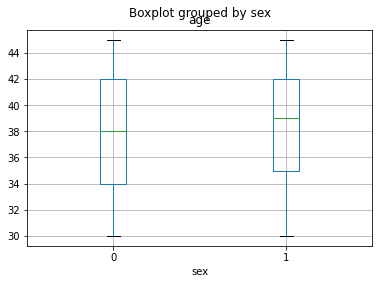

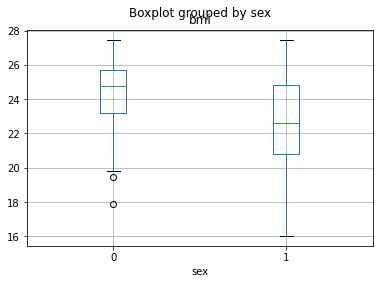

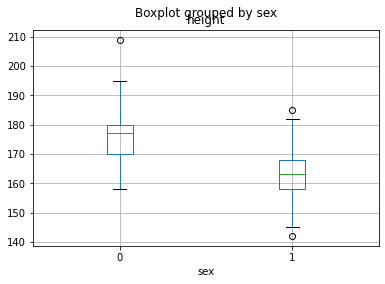

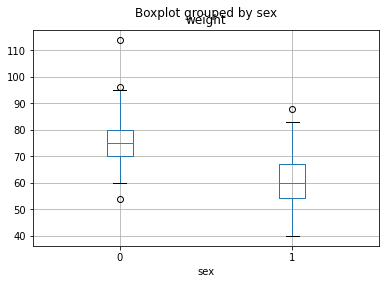

In [31]:
box_cols = ['age','bmi', 'height', 'weight']
for col in box_cols:
    Y_bmi.boxplot(column=col, by="sex")

In [32]:
Y_mail.to_csv(data_processed+'male.csv')
Y_femail.to_csv(data_processed+'female.csv')

# 3. Loading raw data

# 3.1 Raw data structure

In [33]:
# Load raw signal data
df_X = load_raw_data(df_Y, sampling_rate, data_raw)

In [34]:
# Load raw signal data
#X = load_raw_data(Y_norm, sampling_rate, path)

`df_X` is a <i>N * 5000 * 12</i>

`len(df_X) = 3`
`len(df_X[0]) = 5000`
`len(df_X[0][0]) = 12`


In [35]:
ecg = np.asmatrix(df_X[0]).transpose()
ecg.shape

(12, 5000)

In [36]:
filename = "records500/00000/00003_hr"
signals, fields = wfdb.rdsamp(data_raw+filename)
display(signals)
display(fields)

array([[-0.035, -0.07 , -0.035, ..., -0.1  , -0.075, -0.065],
       [-0.035, -0.07 , -0.035, ..., -0.1  , -0.075, -0.065],
       [-0.035, -0.07 , -0.035, ..., -0.1  , -0.075, -0.065],
       ...,
       [-0.04 , -0.18 , -0.14 , ..., -0.015,  0.02 ,  0.025],
       [-0.04 , -0.18 , -0.14 , ..., -0.015,  0.02 ,  0.025],
       [-0.04 , -0.18 , -0.14 , ..., -0.015,  0.02 ,  0.025]])

{'fs': 500,
 'sig_len': 5000,
 'n_sig': 12,
 'base_date': None,
 'base_time': None,
 'units': ['mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV'],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'comments': []}

`record = wfdb.rdrecord(filename)`<br>
`signals, fields = wfdb.rdsamp(filename)`

<ul> Record class:
<li><i>p_signal</i> (priority) or <i>d_signal</i> attribute, signal values as N x M array where:
    <ul>
    <li>N = <i>sig_len</i></li>
    <li>M = <i>n_sig</i></li>
    </ul>
</li>
<li><i>fs</i>, sampling frequency</li>
<li><i>sig_len</i>, length of signal</li>
<li><i>n_sig</i>, number of leads</li> 
<li><i>sig_name</i>, signal name</li>
<li><i>units</i>, signal units</li> 
</ul>

# 4.2 Plotting

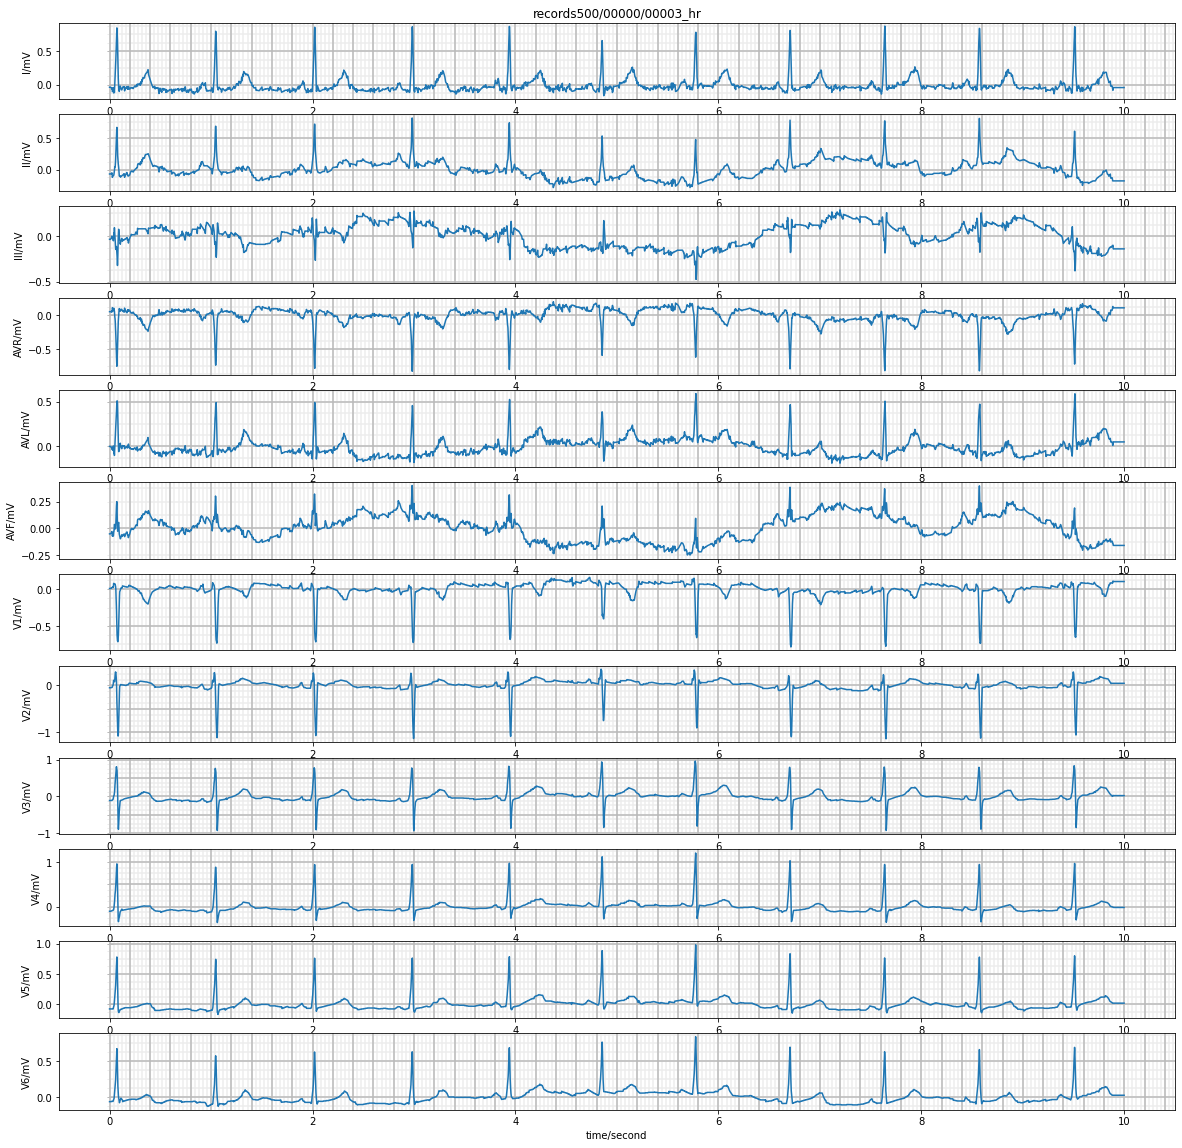

In [37]:
record = wfdb.rdrecord(data_raw+filename)
wfdb.plot_wfdb(record=record, title=filename, time_units='seconds', figsize=(20,20), ecg_grids='all')

# 4. Processing

## 4.1 Resample

In [38]:
# resampled_x, resampled_t = processing.resample_sig(x, fs, fs_target)

## 4.2 Heart Rate

In [39]:
# heart_rate = processing.compute_hr(sig_len, qrs_inds, fs)

## 4.3 Peaks

In [40]:
# hard_peaks, soft_peaks = processing.find_peaks(sig)

In [41]:
# local_peaks = processing.find_loca_peaks(sig, radius)

In [42]:
# shifted_peak_inds = processing.correct_peaks(sig, peak_inds, search_radius, smoooth_window_size)

## 4.4 QRS Detectors

In [43]:
# xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
# xqrs.detect()

# - or -

# qrs_inds = processing.xqrs_detect(sig=sig[:,0], fs=fields['fs'])

In [44]:
'''
type(X)
stats.describe(X)

# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass
'''

'\ntype(X)\nstats.describe(X)\n\n# Split data into train and test\ntest_fold = 10\n# Train\nX_train = X[np.where(Y.strat_fold != test_fold)]\ny_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass\n# Test\nX_test = X[np.where(Y.strat_fold == test_fold)]\ny_test = Y[Y.strat_fold == test_fold].diagnostic_superclass\n'

# 5. FDA

## 5.1 Function representation

note: should be done with same lead from differn subjects instead of different leads from same subject as shown here

In [45]:
t_points = np.linspace(0.01, 10, 5000)
len(t_points)

5000

In [46]:
fd = skfda.FDataGrid(record.p_signal.transpose(),
                     t_points,
                     dataset_name='ECG leads',
                     argument_names=['time'],
                     coordinate_names=['mV'])

fd = fd[:12]

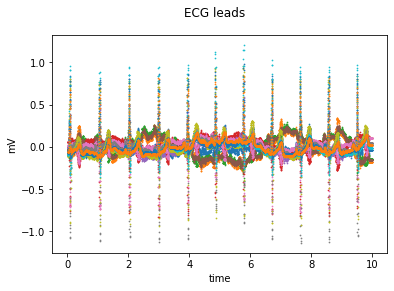

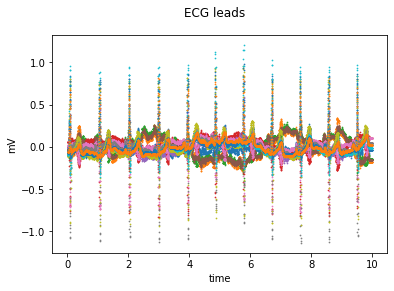

In [47]:
fd.scatter(s=0.5)

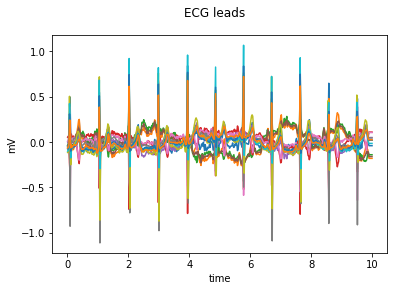

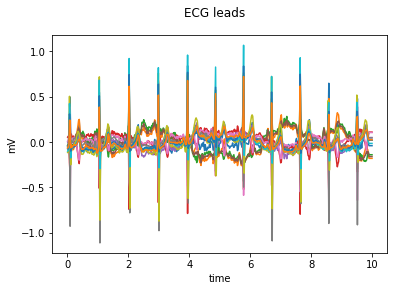

In [48]:
fd.plot()

## 5.2 Basis representation

### 5.2.1 Bspline

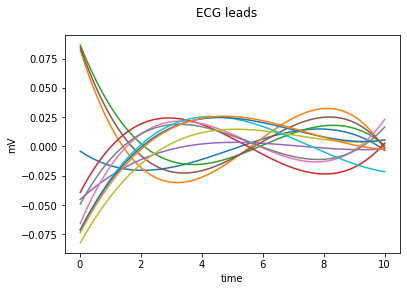

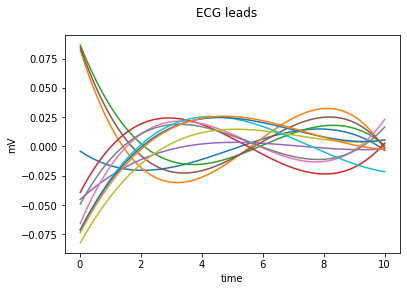

In [49]:
# Represent the FData using a basis B-splines of order 4:
fd_basis = fd.to_basis(skfda.representation.basis.BSpline(n_basis=4))
fd_basis.plot()

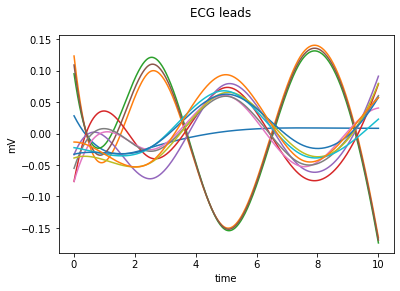

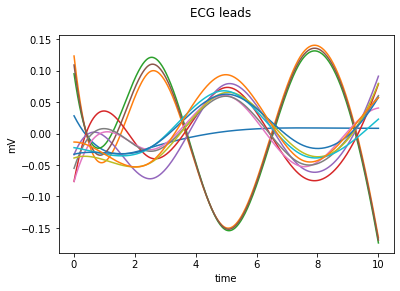

In [50]:
# We can increase the number of elements in the basis to try to reproduce the original data with more fidelity:
fd_basis_big = fd.to_basis(skfda.representation.basis.BSpline(n_basis=7))

fd_basis_big.plot()

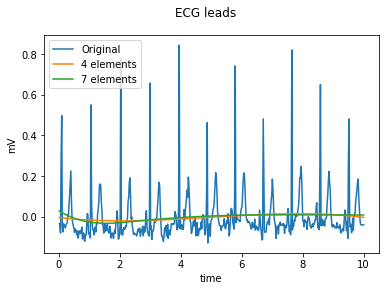

In [51]:
# Compare diferent representations in the same plot, for the same curve

fig = fd[0].plot()
fd_basis[0].plot(fig=fig)
fd_basis_big[0].plot(fig=fig)

fig.axes[0].legend(['Original', '4 elements', '7 elements'])

In [52]:
display(fd)

FDataGrid(
    array([[[-0.035],
            [-0.035],
            [-0.035],
            ...,
            [-0.04 ],
            [-0.04 ],
            [-0.04 ]],
    
           [[-0.07 ],
            [-0.07 ],
            [-0.07 ],
            ...,
            [-0.18 ],
            [-0.18 ],
            [-0.18 ]],
    
           [[-0.035],
            [-0.035],
            [-0.035],
            ...,
            [-0.14 ],
            [-0.14 ],
            [-0.14 ]],
    
           ...,
    
           [[-0.1  ],
            [-0.1  ],
            [-0.1  ],
            ...,
            [-0.015],
            [-0.015],
            [-0.015]],
    
           [[-0.075],
            [-0.075],
            [-0.075],
            ...,
            [ 0.02 ],
            [ 0.02 ],
            [ 0.02 ]],
    
           [[-0.065],
            [-0.065],
            [-0.065],
            ...,
            [ 0.025],
            [ 0.025],
            [ 0.025]]]),
    grid_points=(array([ 0.01     ,  0.01

## 5.3 Smoothing

### 5.3.1 Local Linear Regression Smoother

Linear smoothers, meaning that they compute a smoothing matrix (or hat matrix) that performs the smoothing as a linear transformation.

In [53]:
smoother = skfda.preprocessing.smoothing.kernel_smoothers.LocalLinearRegressionSmoother(smoothing_parameter=3.5)
fd_smoothed = smoother.fit_transform(fd)
fd_smoothed.data_matrix.round(2)

array([[[-0.02],
        [-0.02],
        [-0.02],
        ...,
        [ 0.01],
        [ 0.01],
        [ 0.01]],

       [[ 0.02],
        [ 0.02],
        [ 0.02],
        ...,
        [ 0.04],
        [ 0.04],
        [ 0.04]],

       [[ 0.04],
        [ 0.04],
        [ 0.04],
        ...,
        [ 0.03],
        [ 0.03],
        [ 0.03]],

       ...,

       [[-0.03],
        [-0.03],
        [-0.03],
        ...,
        [-0.02],
        [-0.02],
        [-0.02]],

       [[-0.04],
        [-0.04],
        [-0.04],
        ...,
        [ 0.  ],
        [ 0.  ],
        [ 0.  ]],

       [[-0.04],
        [-0.04],
        [-0.04],
        ...,
        [-0.  ],
        [-0.  ],
        [-0.  ]]])

In [54]:
smoother.hat_matrix().round(3)

array([[ 0.001,  0.001,  0.001, ..., -0.   , -0.   , -0.   ],
       [ 0.001,  0.001,  0.001, ..., -0.   , -0.   , -0.   ],
       [ 0.001,  0.001,  0.001, ..., -0.   , -0.   , -0.   ],
       ...,
       [-0.   , -0.   , -0.   , ...,  0.001,  0.001,  0.001],
       [-0.   , -0.   , -0.   , ...,  0.001,  0.001,  0.001],
       [-0.   , -0.   , -0.   , ...,  0.001,  0.001,  0.001]])

## 5.4 Registration

### 5.4.1 Landmark Registration

In [55]:
# we need to know in advance the location of the landmarks of each of the samples,  
# it will be necessary to use numerical or other methods to determine the location of the landmarks.
landmarks = skfda.datasets.make_multimodal_landmarks(n_samples=12, n_modes=22,
                                                     std=.002, random_state=1
                                                     ).squeeze()

print(landmarks)

[[-0.84040055 -0.85344554 -0.76275099 -0.70015853 -0.52651519 -0.58118881
  -0.31327399 -0.33839003 -0.20312344 -0.14158696  0.02190919 -0.04865403
   0.11601585  0.20021587  0.35505154  0.34211571  0.47054965  0.52595837
   0.65406177  0.76519472  0.77686577  0.96423708]
 [-0.87272312 -0.80361473 -0.69884293 -0.68275115 -0.57071321 -0.52010975
  -0.40328467 -0.28062961 -0.24832331 -0.14817814 -0.07420956  0.00567952
   0.10041574  0.21682493  0.25438019  0.40178774  0.55248948  0.59840262
   0.64359477  0.69943446  0.79267302  0.98873235]
 [-0.91077129 -0.85457427 -0.73059243 -0.55824765 -0.55984372 -0.45065871
  -0.37788032 -0.32010092 -0.26848627 -0.14605786 -0.05282029  0.06971285
   0.16795526  0.25903146  0.31711968  0.43088906  0.44452317  0.62124736
   0.67511283  0.72579932  0.84793415  0.90966381]
 [-0.86243547 -0.75811868 -0.64138853 -0.71462713 -0.62980012 -0.50082127
  -0.38414727 -0.26516436 -0.20327568 -0.22087037 -0.05717212  0.08050641
   0.14072493  0.25146948  0.2944

In [56]:
lm_location = np.linspace(0.2, 9.8, 22)
print(lm_location)

lm_y = [0.75, 0.2]*11
print(lm_y)

[0.2        0.65714286 1.11428571 1.57142857 2.02857143 2.48571429
 2.94285714 3.4        3.85714286 4.31428571 4.77142857 5.22857143
 5.68571429 6.14285714 6.6        7.05714286 7.51428571 7.97142857
 8.42857143 8.88571429 9.34285714 9.8       ]
[0.75, 0.2, 0.75, 0.2, 0.75, 0.2, 0.75, 0.2, 0.75, 0.2, 0.75, 0.2, 0.75, 0.2, 0.75, 0.2, 0.75, 0.2, 0.75, 0.2, 0.75, 0.2]


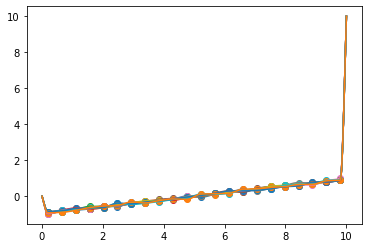

In [57]:
warping = skfda.preprocessing.registration.landmark_registration_warping(fd, landmarks, location=lm_location)

# Plots warping
fig = warping.plot()

# Plot landmarks
for i in range(fd.n_samples):
    fig.axes[0].scatter(lm_location, landmarks[i])

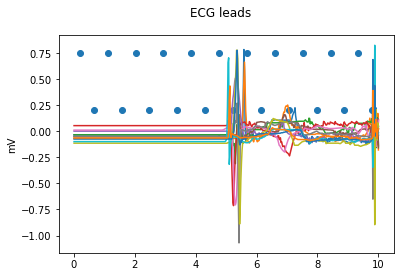

In [58]:
fd_registered = fd.compose(warping)
fig = fd_registered.plot()

fig.axes[0].scatter(lm_location, lm_y)

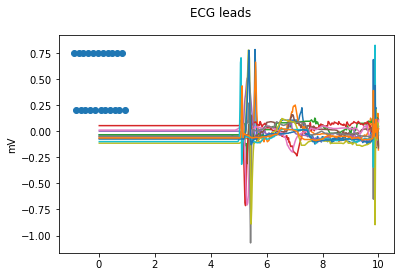

In [59]:
fd_registered = skfda.preprocessing.registration.landmark_registration(fd, landmarks, location=lm_location)
fd_registered.plot()

plt.scatter(np.mean(landmarks, axis=0), lm_y)


plt.show()

In [60]:
# Perform landmark registration of the curves
#skfda.preprocessing.registration.landmark_registration(fd, landmarks)

In [61]:
# Calculate the transformation used in landmark registration
#skfda.preprocessing.registration.landmark_registration_warping(fd, …)